In [ ]:
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *

In [2]:
data_chr22 = pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/annotations/chr22_data.pkl")


In [7]:
adata_test =sc.read_h5ad("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/plots/analysis_adata_test.h5ad")



In [3]:
adata = data_chr22.adata.copy()


In [20]:

sc.pp.scale(data_chr22.adata, max_value=10)

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
scdata

AnnData object with n_obs × n_vars = 1272489 × 32738
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pool', 'individual', 'percent.mt', 'latent', 'nCount_SCT', 'nFeature_SCT', 'cell_type', 'cell_label', 'sex', 'age'
    var: 'GeneSymbol', 'features', 'chromosome', 'start', 'end'

In [2]:
scdata =sc.read_h5ad("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/OneK1K_cohort_gene_expression_matrix_14_celltypes_w_gene_locations.h5ad.gz")


In [ ]:
# sc.tl.umap(adata)
# sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])
sc.pp.neighbors(adata, use_rep='X_pca')  # Ensure neighbors are computed only if necessary
sc.tl.umap(adata)

# Plot with cell type annotations
sc.pl.umap(adata, color='cell_type', title='UMAP by Cell Type')

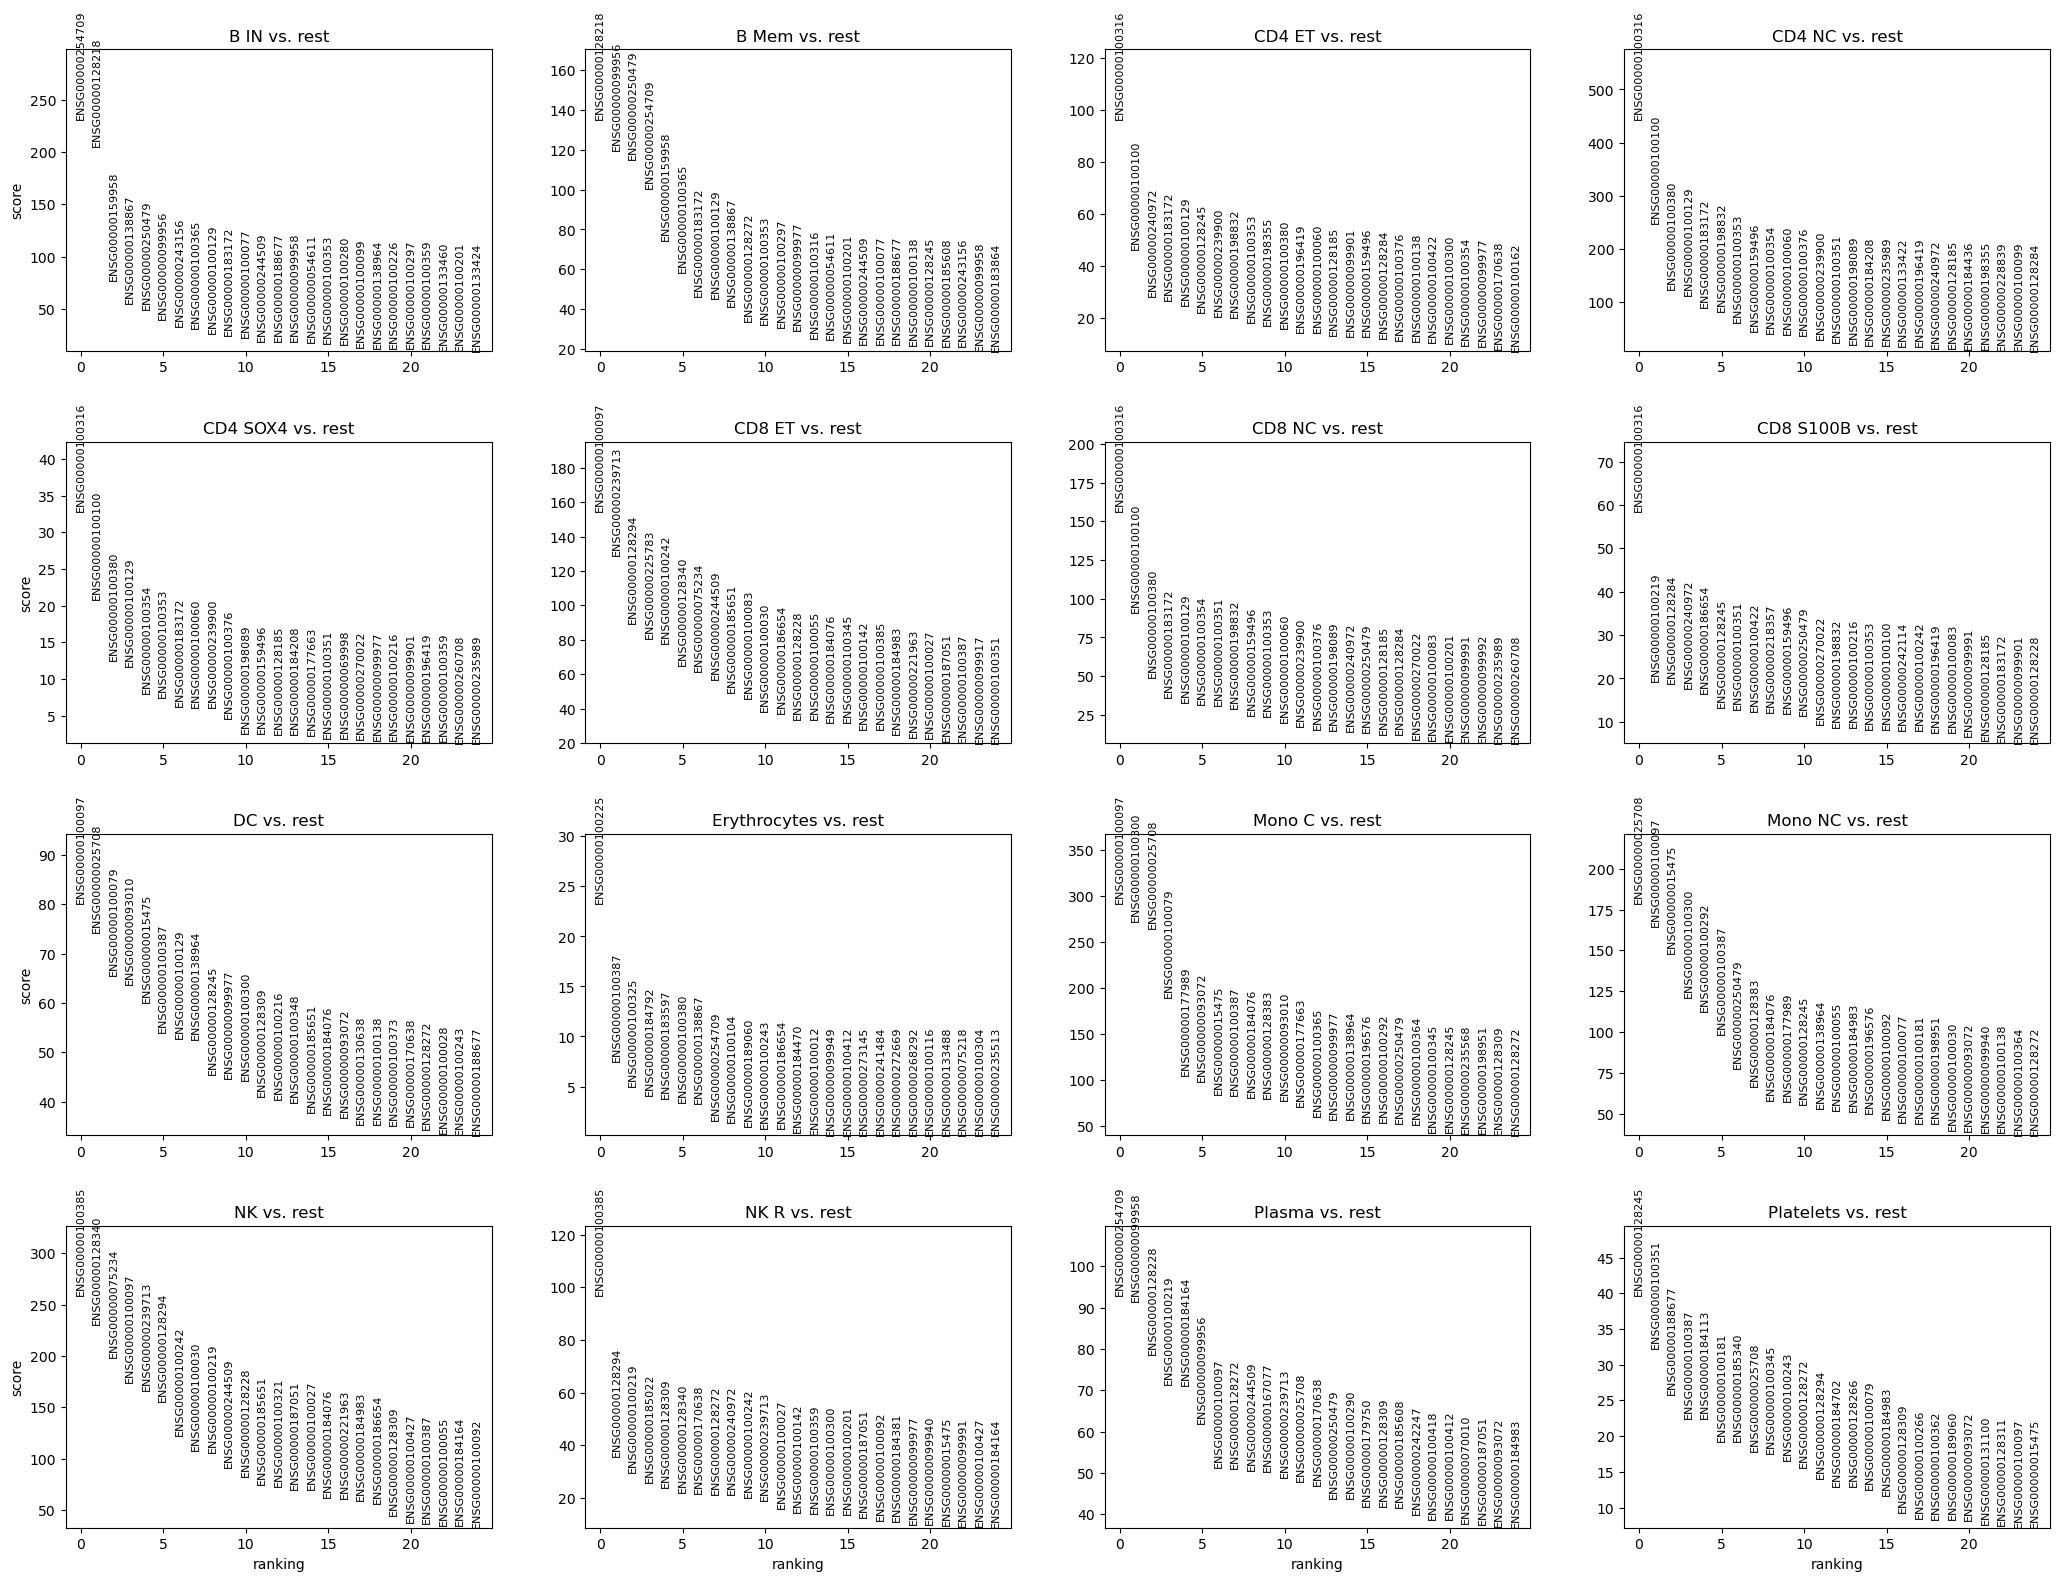

In [4]:

sc.tl.rank_genes_groups(adata, 'cell_label', method='wilcoxon') 
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


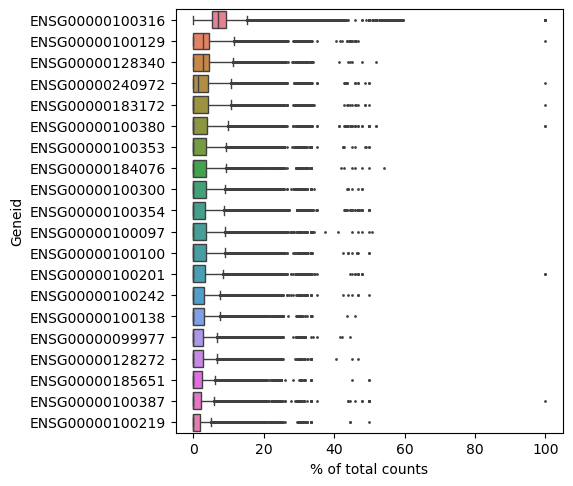

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [7]:
marker_genes = adata.uns['rank_genes_groups']
marker_genes_df = pd.DataFrame({
    group: marker_genes['names'][group] for group in marker_genes['names'].dtype.names
})
#print(marker_genes_df.head())

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 655 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


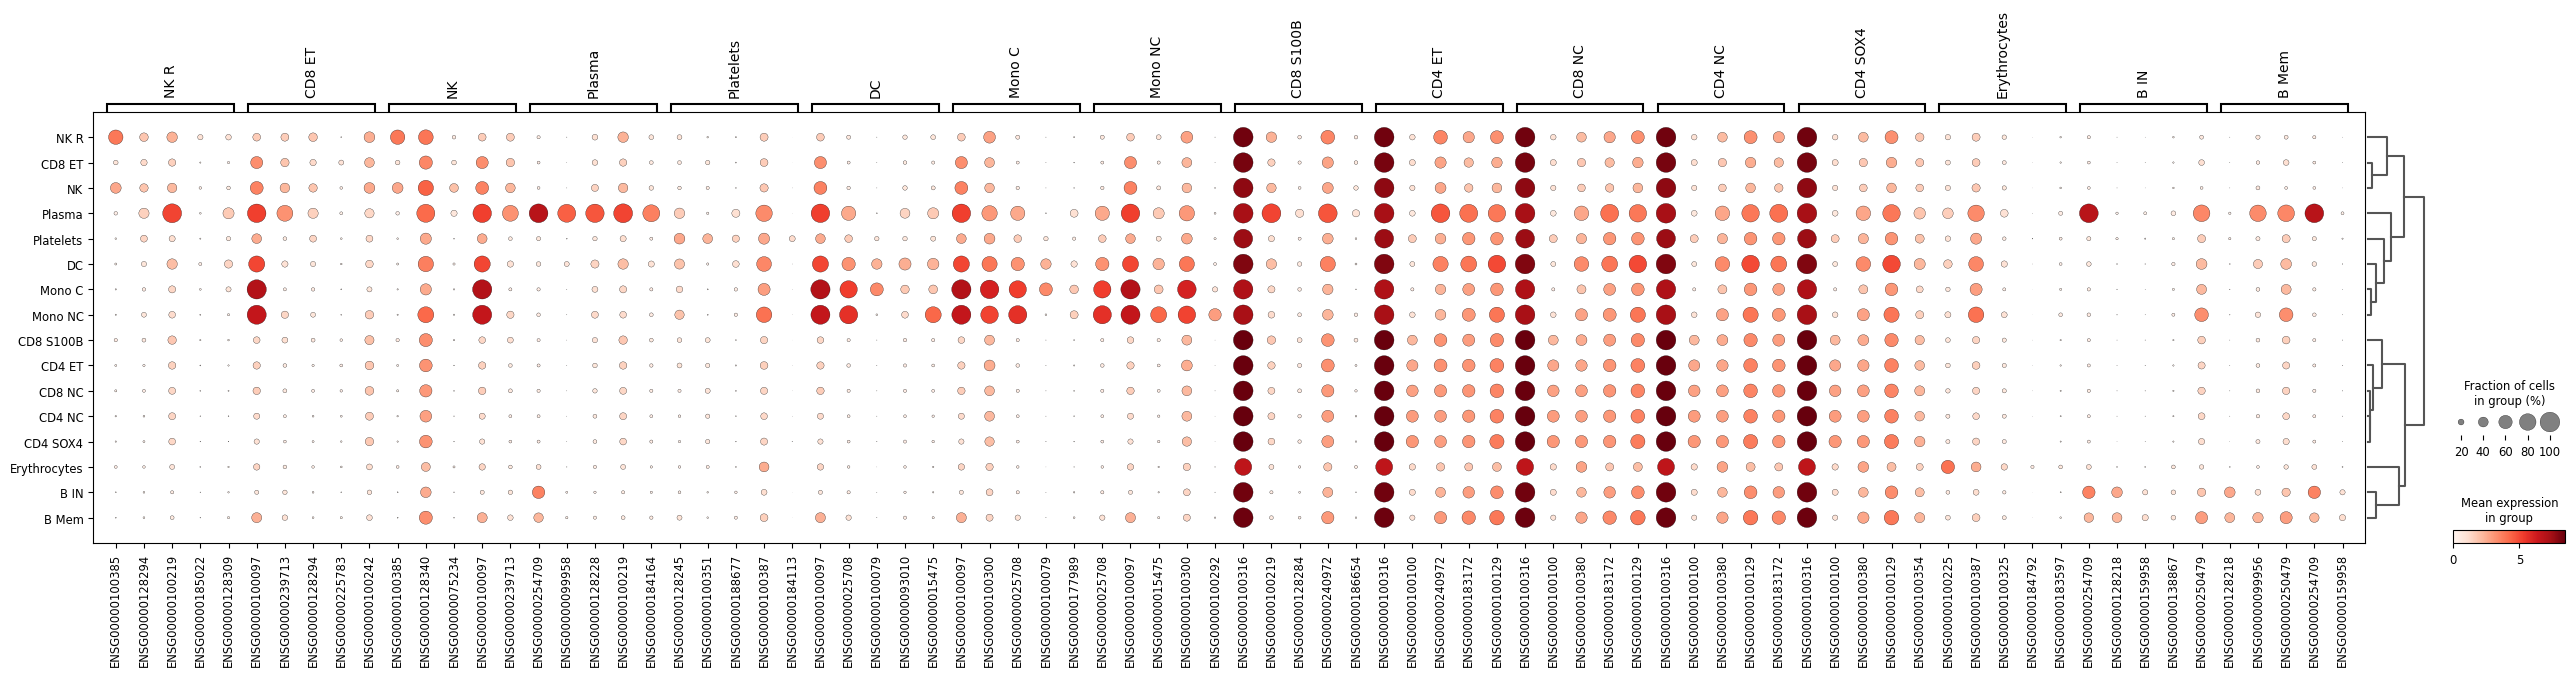

In [8]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)

In [5]:
top_genes = pd.DataFrame({
    group: adata.uns['rank_genes_groups']['names'][group][:3]
    for group in adata.uns['rank_genes_groups']['names'].dtype.names
})
top_3_markers=list(pd.unique((top_genes.values.ravel())))


In [8]:
adata_test

#sc.pl.violin(adata, top_3_markers, groupby='cell_label')

AnnData object with n_obs × n_vars = 1272489 × 655
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pool', 'individual', 'percent.mt', 'latent', 'nCount_SCT', 'nFeature_SCT', 'cell_type', 'cell_label', 'sex', 'age'
    var: 'GeneSymbol', 'features', 'chromosome', 'start', 'end', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'log1p', 'raw'
    obsp: 'connectivities', 'distances'

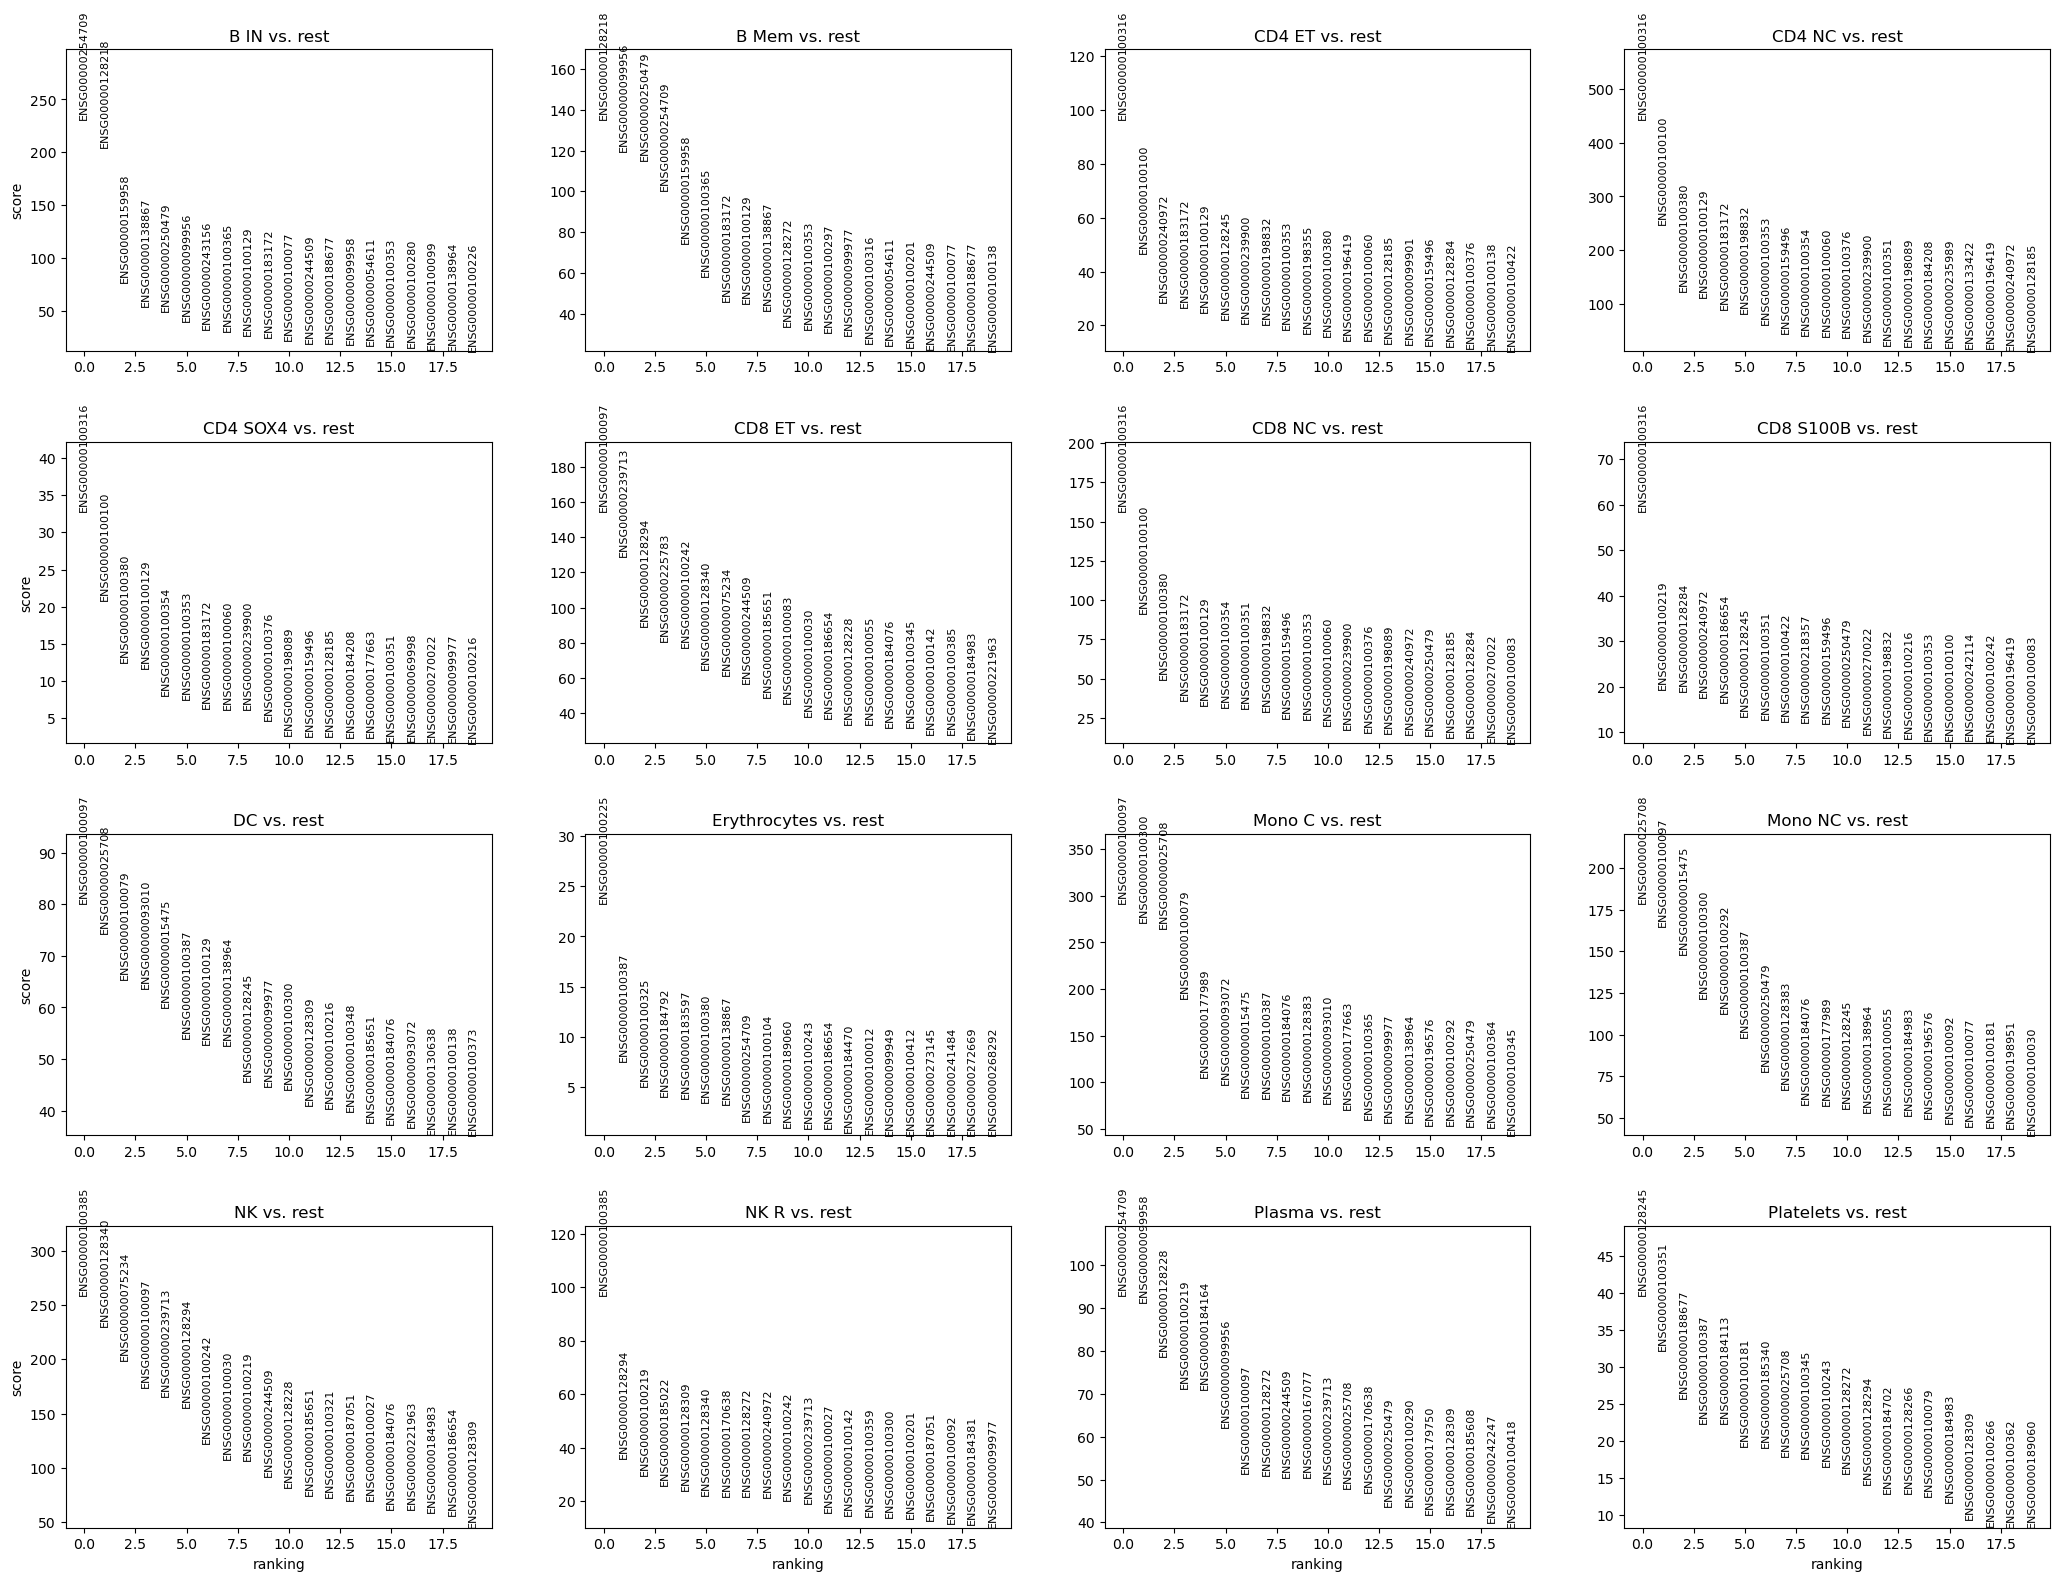

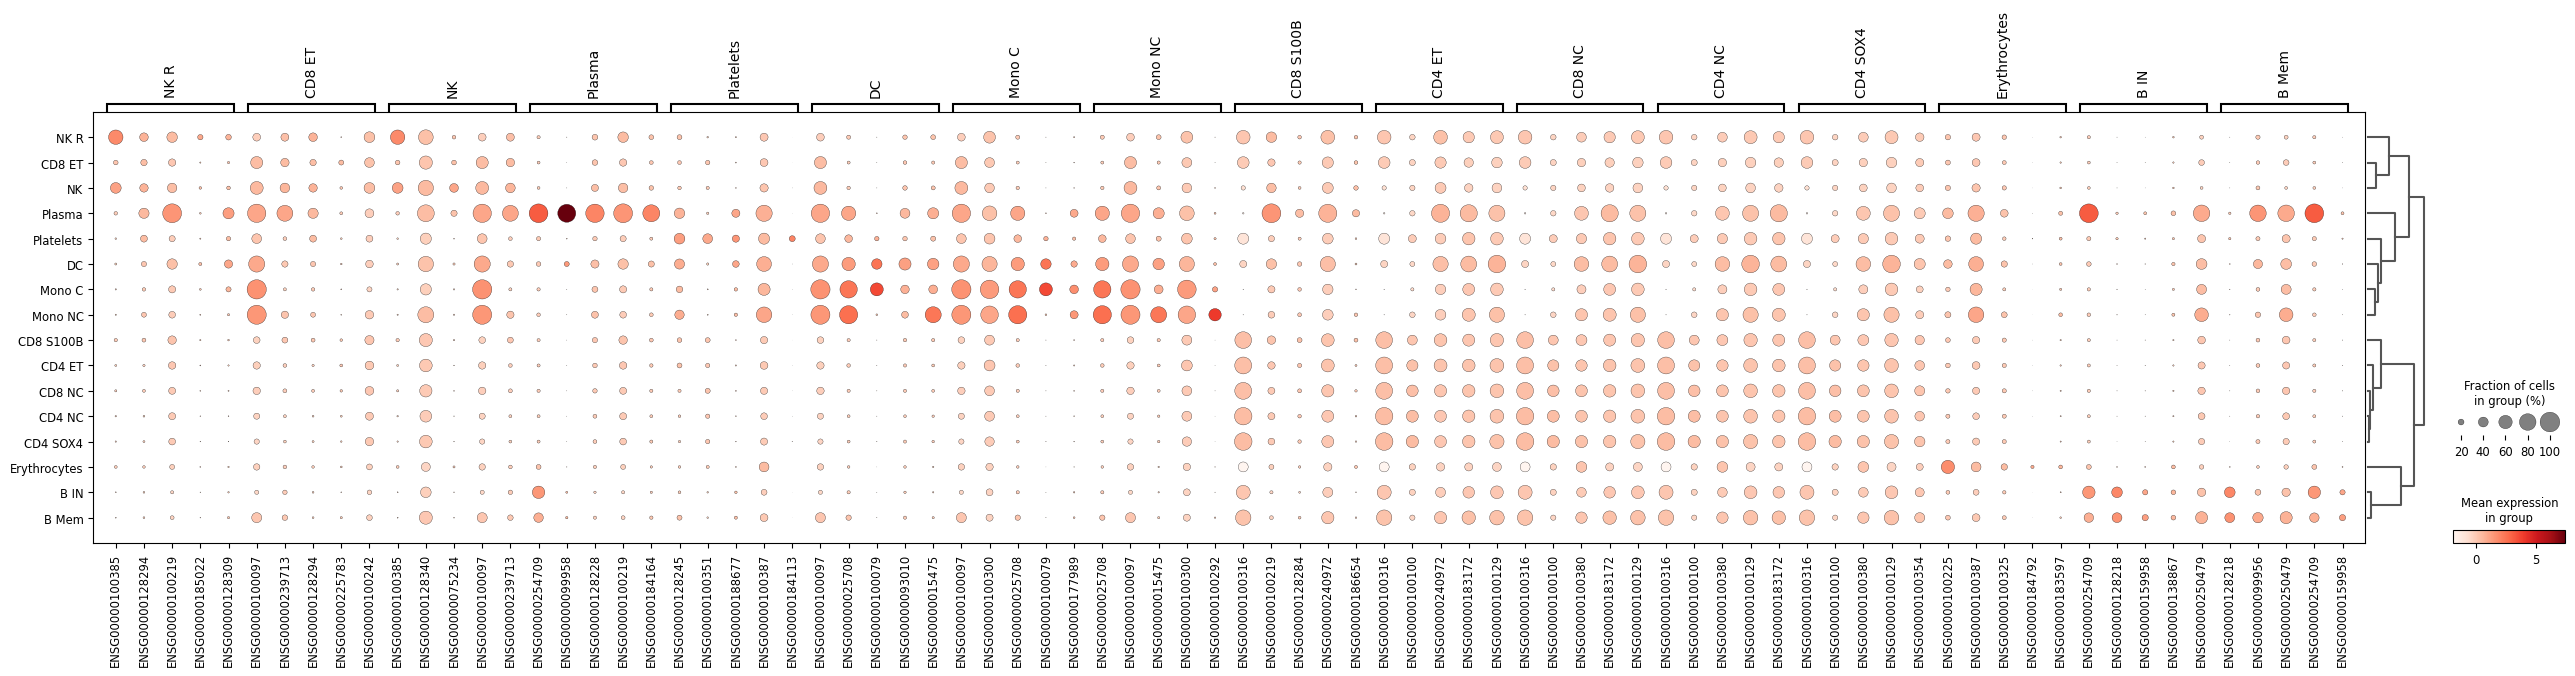

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


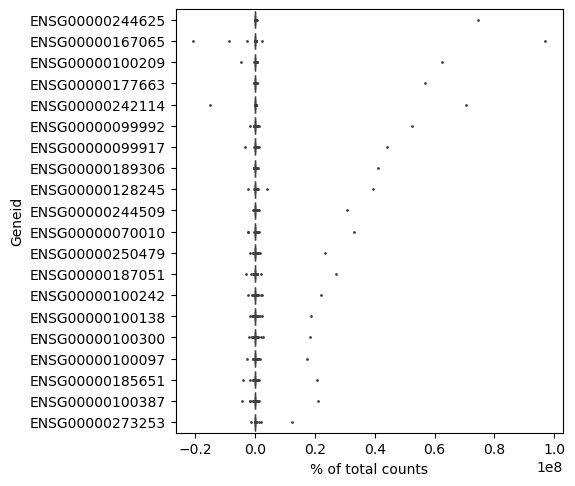

In [11]:
out_path = "/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/plots"
sc.settings.figdir = out_path
sc.pl.rank_genes_groups(adata_test, n_genes=20, sharey=False, save=f"rank_genes.png")
sc.pl.rank_genes_groups_dotplot(adata_test, n_genes=5, save=f"dotplot_rank_genes.png")
sc.pl.highest_expr_genes(adata_test, n_top=20,save=f"highest_expr_genes.png")


In [2]:
scdata = sc.read_h5ad("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/analysis_adata.h5ad")

In [13]:
scdata.obs["individual"]

barcode
AAACCTGAGAATGTTG-1    691_692
AAACCTGAGAGAACAG-1    693_694
AAACCTGAGCATGGCA-1    688_689
AAACCTGAGTATTGGA-1    683_684
AAACCTGAGTGTCCCG-1    684_685
                       ...   
TTTGTCATCCGCTGTT-9    796_797
TTTGTCATCCGTTGTC-9    800_801
TTTGTCATCGCCGTGA-9    821_822
TTTGTCATCGCGGATC-9    840_841
TTTGTCATCTCGTATT-9    821_822
Name: individual, Length: 1272489, dtype: category
Categories (981, object): ['1_1', '2_2', '3_3', '4_4', ..., '1078_1079', '1079_1080', '1080_1081', '1081_1082']

In [14]:
cell_counts = scdata.obs.groupby(['cell_label', 'individual']).size().reset_index(name='cell_count')


/scratch/tmp/l_back/ipykernel_1232602/1501902588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = scdata.obs.groupby(['cell_label', 'individual']).size().reset_index(name='cell_count')


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scanpy as sc

In [15]:
cell_counts

cell_label individual  cell_count
0           B IN        1_1         151
1           B IN        2_2           9
2           B IN        3_3          59
3           B IN        4_4          52
4           B IN        6_6          75
...          ...        ...         ...
15691  Platelets  1077_1078          11
15692  Platelets  1078_1079          15
15693  Platelets  1079_1080          19
15694  Platelets  1080_1081          27
15695  Platelets  1081_1082          13

[15696 rows x 3 columns]

/scratch/tmp/l_back/ipykernel_1232602/2600952993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cell_counts, x='cell_label', y='cell_count', palette='viridis')


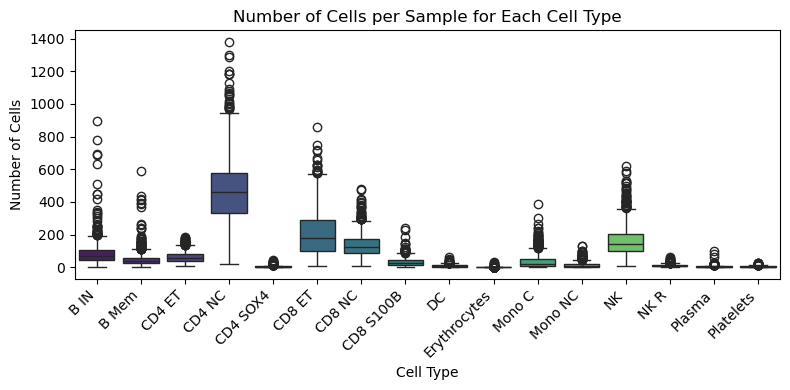

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=cell_counts, x='cell_label', y='cell_count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.title('Number of Cells per Sample for Each Cell Type')
plt.tight_layout()

# Show the plot
plt.show()